# Credit Card Fraud Detection
**Author**: `Terra Keeratinavanant`

**Description**: Logistic Regression model on imbalanced dataset to classify transactions as either fraud or non-fraud, evaluated by Area under the Precision-Recall curve (PR AUC)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

## Load Data and Data Exploration

In [5]:
# load data
df = pd.read_csv("../creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- Column V1 to V28 contains numerical input variables which have been transformed with PCA
- Column 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset
- Column 'Amount' is the transaction Amount
- Column 'Class' is the response variable and it takes value 1 in case of fraud and 0 in case of non-fraud

## Data Preparation

In [8]:
# check and drop duplicates
print(df[df.duplicated() == True].shape)
df.drop_duplicates(inplace = True)

(1081, 31)


In [9]:
# check missing values
print(df.isna().sum().sort_values(ascending = False))
df.dropna(inplace = True)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [10]:
# Select feature and target variables
X = df.drop(columns = ['Time', 'Class'])
y = df[['Class']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20, stratify = y)

In [11]:
# check for outliers
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


## Data Analysis

In [12]:
print(y_train['Class'].value_counts())
print(y_train['Class'].value_counts(normalize = True))

Class
0    198277
1       331
Name: count, dtype: int64
Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


This is an imbalanced dataset; thus, I use undersampling technique

In [13]:
train_data = pd.concat([X_train, y_train], axis=1)

fraud = train_data[train_data['Class'] == 1]
non_fraud = train_data[train_data['Class'] == 0]

# Set the sample size to match the minority class
non_fraud_undersampled = resample(non_fraud,
                                  replace = False,
                                  n_samples = int(len(non_fraud)*0.25), # retain 25% of non-fraud data
                                  random_state = 20)

balanced_df = pd.concat([non_fraud_undersampled, fraud])
balanced_df = balanced_df.sample(frac=1, random_state=20).reset_index(drop=True)

# Check new class distribution
balanced_df['Class'].value_counts()

X_under = balanced_df.drop(columns = ['Class'])
y_under = balanced_df['Class']

In [14]:
print(y_under.value_counts())
print(y_under.value_counts(normalize = True))

Class
0    49569
1      331
Name: count, dtype: int64
Class
0    0.993367
1    0.006633
Name: proportion, dtype: float64


### Remove Outliers

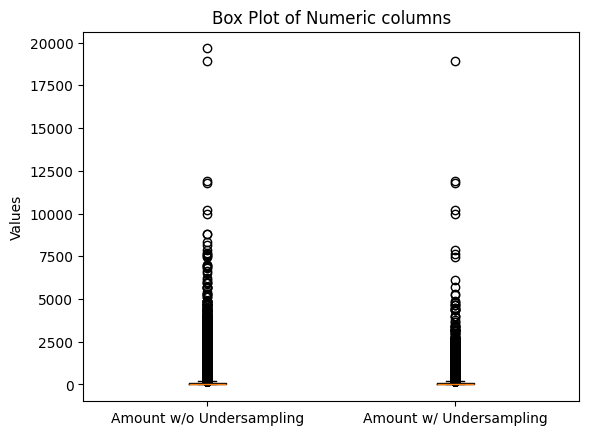

In [15]:
# Outliers visualization in 'Amount' column

plt.boxplot([X_train['Amount'], X_under['Amount']])
plt.title('Box Plot of Numeric columns')
plt.xticks([1,2], ['Amount w/o Undersampling', 'Amount w/ Undersampling'])
plt.ylabel('Values')

plt.show()

Capping X_train w/o Undersampling

In [16]:
# Capping based on percentiles for each numeric column in the DataFrame
X_train_capped = X_train.copy()
lower_cap = X_train_capped.quantile(0.01)
upper_cap = X_train_capped.quantile(0.99)

# replace values that are not within 1st to 99th percentile with 1st or 99th percentile
for col in X_train_capped.columns:
    X_train_capped[col] = np.where(X_train_capped[col] < lower_cap[col], lower_cap[col],
                                   np.where(X_train_capped[col] > upper_cap[col], upper_cap[col], X_train_capped[col]))

Capping X_train w/ Undersampling

In [17]:
# Capping based on percentiles for each numeric column in the DataFrame
X_under_capped = X_under.copy()
lower_cap = X_under_capped.quantile(0.01)
upper_cap = X_under_capped.quantile(0.99)

# replace values that are not within 1st to 99th percentile with 1st or 99th percentile
for col in X_under_capped.columns:
    X_under_capped [col] = np.where(X_under_capped [col] < lower_cap[col], lower_cap[col],
                                   np.where(X_under_capped [col] > upper_cap[col], upper_cap[col], X_under_capped [col]))

#### Standard Scaler
To address feature 'Amount' which have a different scale than other features

In [18]:
# Initialize scalers
scaler = StandardScaler()
scaler_under = StandardScaler()

X_train_capped_scaled = X_train_capped.copy()
X_under_capped_scaled = X_under_capped.copy()

X_train_capped_scaled = scaler.fit_transform(X_train_capped_scaled)
X_under_capped_scaled = scaler_under.fit_transform(X_under_capped_scaled)

# Copy X_test before transformation
X_test_scaled = X_test.copy()
X_test_under_scaled = X_test.copy()

# Transform the test data (use scaler fitted on training data)
X_test_scaled = scaler.transform(X_test_scaled)
X_test_under_scaled = scaler_under.transform(X_test_under_scaled)

## Data Prediction
Using Logistic Regression model, The features variables will be V1 to V28 and Amount columns while the target variable is Class (Fraud/Non-Fraud). I excluded Time from feature variables as it is in the format of sequence, not timestamp, and hence, not meaningful for fraud detection.

### W/o Undersampling + W/o Scaling

In [19]:
# Build Logistic Regression model
model = LogisticRegression()
model.fit(X_train_capped, y_train)
y_pred_prob = model.predict_proba(X_test)[:, -1]

# Compute precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate the area under the precision-recall curve (PR AUC)
pr_auc = auc(recall, precision)
print(f'Area Under the Precision-Recall Curve (PR AUC): {pr_auc}')

C:\Users\Terra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Area Under the Precision-Recall Curve (PR AUC): 0.7436838053575148


C:\Users\Terra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Because this is an imbalanced dataset and I am focusing on performance of the positive class (detected as fraud), the score will be better represented using Area Under the Precision-Recall Curve (PR AUC)

### Undersampling + W/o Scaling

In [20]:
model = LogisticRegression()
model.fit(X_under_capped, y_under)
y_pred_prob2 = model.predict_proba(X_test)[:, -1]

precision2, recall2, thresholds2 = precision_recall_curve(y_test, y_pred_prob2)
pr_auc2 = auc(recall2, precision2)
print(f'Area Under the Precision-Recall Curve (PR AUC): {pr_auc2}')

Area Under the Precision-Recall Curve (PR AUC): 0.7269660372677507


C:\Users\Terra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### W/o Undersampling + Scaling

In [21]:
model = LogisticRegression()
model.fit(X_train_capped_scaled, y_train)
y_pred_prob3 = model.predict_proba(X_test_scaled)[:, -1]

precision3, recall3, thresholds3 = precision_recall_curve(y_test, y_pred_prob3)
pr_auc3 = auc(recall3, precision3)
print(f'Area Under the Precision-Recall Curve (PR AUC): {pr_auc3}')

C:\Users\Terra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Area Under the Precision-Recall Curve (PR AUC): 0.7466462675313014


### Undersampling + Scaling

In [22]:
model = LogisticRegression()
model.fit(X_under_capped_scaled, y_under)
y_pred_prob4 = model.predict_proba(X_test_under_scaled)[:, -1]

precision4, recall4, thresholds4 = precision_recall_curve(y_test, y_pred_prob4)
pr_auc4 = auc(recall4, precision4)
print(f'Area Under the Precision-Recall Curve (PR AUC): {pr_auc4}')

Area Under the Precision-Recall Curve (PR AUC): 0.7207282674325907


## Data Visualization

### Precision-Recall Curve w/o Scaling

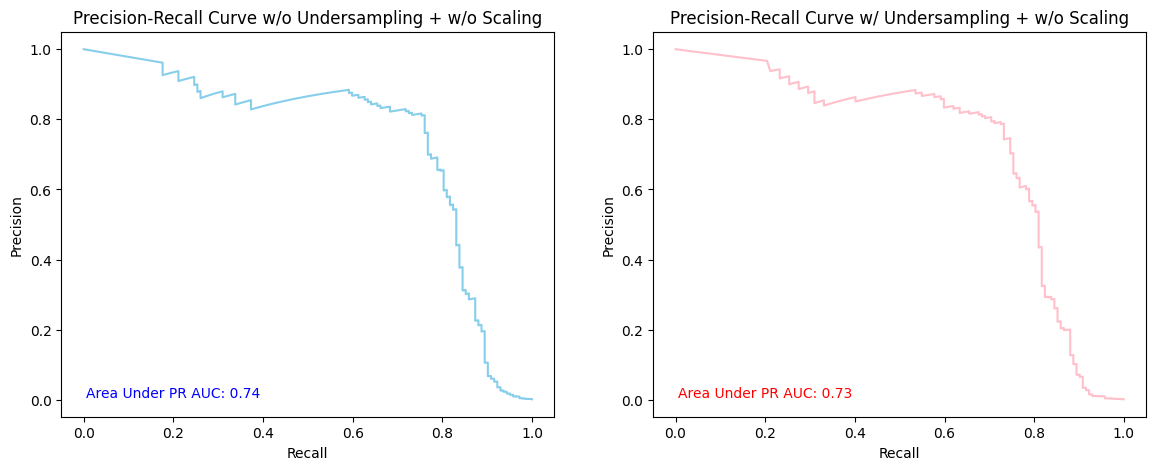

In [23]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(recall, precision, color = 'skyblue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve w/o Undersampling + w/o Scaling')
plt.text(0.05, 0.05, f"Area Under PR AUC: {round(pr_auc, 2)}", fontsize=10, color='blue',
         transform=plt.gca().transAxes)

plt.subplot(1,2,2)
plt.plot(recall2, precision2, color = 'pink')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve w/ Undersampling + w/o Scaling')
plt.text(0.05, 0.05, f'Area Under PR AUC: {round(pr_auc2, 2)}', fontsize=10, color='red',
         transform=plt.gca().transAxes)

plt.show()


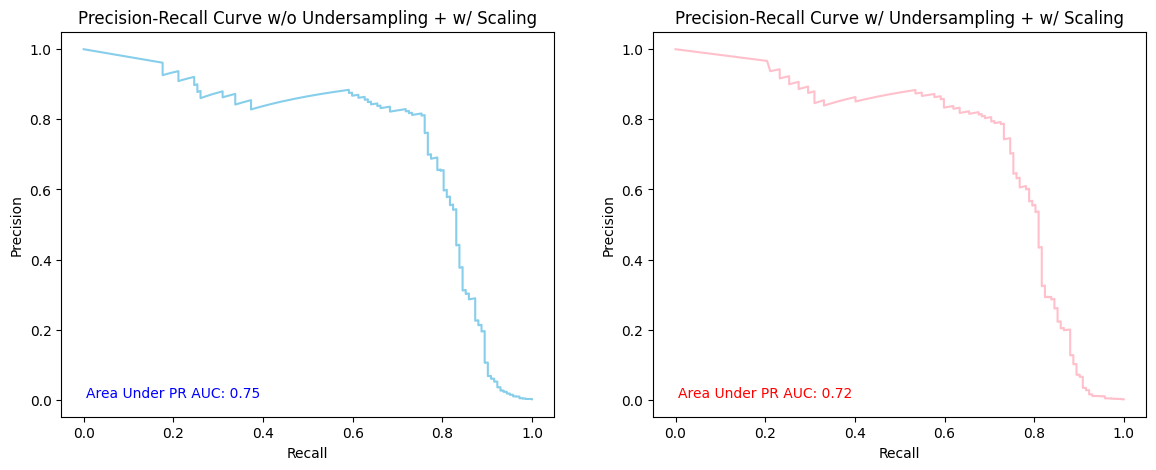

In [30]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(recall, precision, color = 'skyblue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve w/o Undersampling + w/ Scaling')
plt.text(0.05, 0.05, f"Area Under PR AUC: {round(pr_auc3, 2)}", fontsize=10, color='blue',
         transform=plt.gca().transAxes)

plt.subplot(1,2,2)
plt.plot(recall2, precision2, color = 'pink')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve w/ Undersampling + w/ Scaling')
plt.text(0.05, 0.05, f'Area Under PR AUC: {round(pr_auc4, 2)}', fontsize=10, color='red',
         transform=plt.gca().transAxes)

plt.show()

### Distribution of features in Original train VS test dataset

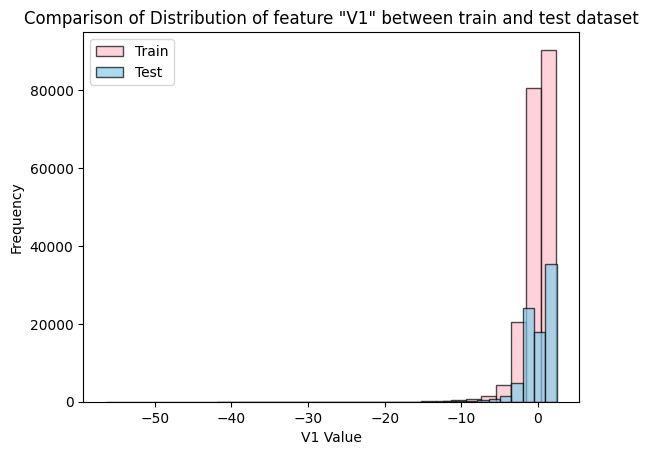

In [25]:
plt.hist(X_train['V1'], bins=30, alpha=0.7, label='Train', color = 'pink', edgecolor = 'black')
plt.hist(X_test['V1'], bins=30, alpha=0.7, label='Test', color = 'skyblue', edgecolor = 'black')
plt.title('Comparison of Distribution of feature "V1" between train and test dataset')
plt.xlabel('V1 Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

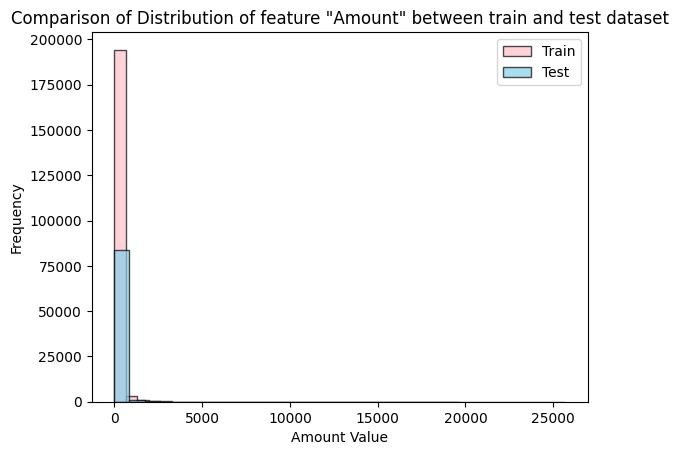

In [26]:
plt.hist(X_train['Amount'], bins=30, alpha=0.7, label='Train', color = 'pink', edgecolor = 'black')
plt.hist(X_test['Amount'], bins=30, alpha=0.7, label='Test', color = 'skyblue', edgecolor = 'black')
plt.title('Comparison of Distribution of feature "Amount" between train and test dataset')
plt.xlabel('Amount Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Transaction Class across Time in Original Dataset

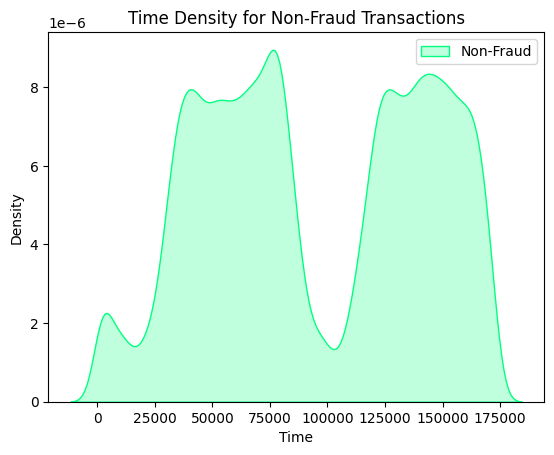

In [27]:
sns.kdeplot(df.loc[df['Class'] == 0, 'Time'], label='Non-Fraud', fill=True, color = 'springgreen')
plt.title('Time Density for Non-Fraud Transactions')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.show()

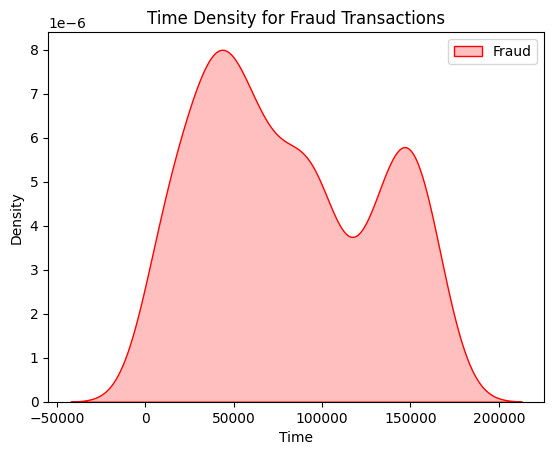

In [28]:
sns.kdeplot(df.loc[df['Class'] == 1, 'Time'], label = 'Fraud', fill = True, color = 'red')
plt.title('Time Density for Fraud Transactions')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.show()

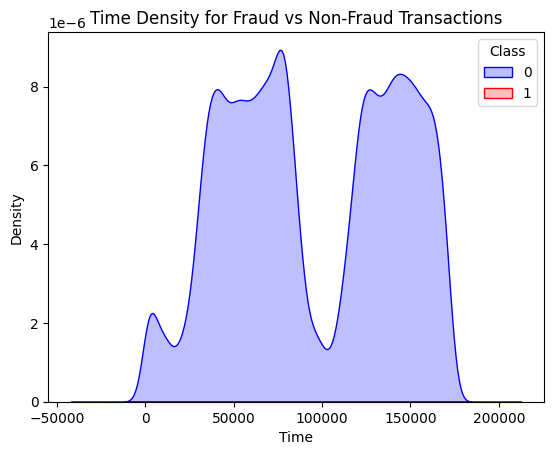

In [29]:
sns.kdeplot(data = df, x = 'Time', hue = 'Class', fill = True, palette = ['blue', 'red'])
plt.title('Time Density for Fraud vs Non-Fraud Transactions')
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()